<a href="https://colab.research.google.com/github/Ohellay/arbitrary/blob/main/Home_Price_Projection_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Background to the study!

Supervised learning is a type of machine learning where the algorithm is trained on labeled data to learn the relationship between input features and output targets. The goal is to make accurate predictions on new, unseen data. The goal, types, training data, model can be seen below

- Goal: Predict a continuous output variable (target) based on input features
- Type: Regression
- Training data: Labeled examples of input features and corresponding target values
- Model: Learns to map input features to predicted target values

Regression Problem

- Objective: Predict a continuous value (target) for a given input
- Example: Predicting house prices based on features like number of bedrooms, square footage, location, etc.

The study looks over The Ames Housing dataset which  was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.


[Problem 1] Feature selection for practice

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Downloads/train.csv")

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Extract explanatory variables
GrLivArea = df['GrLivArea']
YearBuilt = df['YearBuilt']

# Extract objective variable
SalePrice = df['SalePrice']

In [ ]:
# Create a new DataFrame with the extracted variables
new_df = pd.DataFrame({
    'GrLivArea': GrLivArea,
    'YearBuilt': YearBuilt,
    'SalePrice': SalePrice
})
new_df.head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [ ]:
new_df.describe()

,GrLivArea,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000
mean,1515.463699,1971.267808,180921.195890
std,525.480383,30.202904,79442.502883
min,334.000000,1872.000000,34900.000000
25%,1129.500000,1954.000000,129975.000000
50%,1464.000000,1973.000000,163000.000000
75%,1776.750000,2000.000000,214000.000000
max,5642.000000,2010.000000,755000.000000


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   YearBuilt  1460 non-null   int64
 2   SalePrice  1460 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB


In [ ]:
new_df.isnull().sum()

GrLivArea    0
YearBuilt    0
SalePrice    0
dtype: int64

In [ ]:
new_df.corr()["SalePrice"]

GrLivArea    0.708624
YearBuilt    0.522897
SalePrice    1.000000
Name: SalePrice, dtype: float64

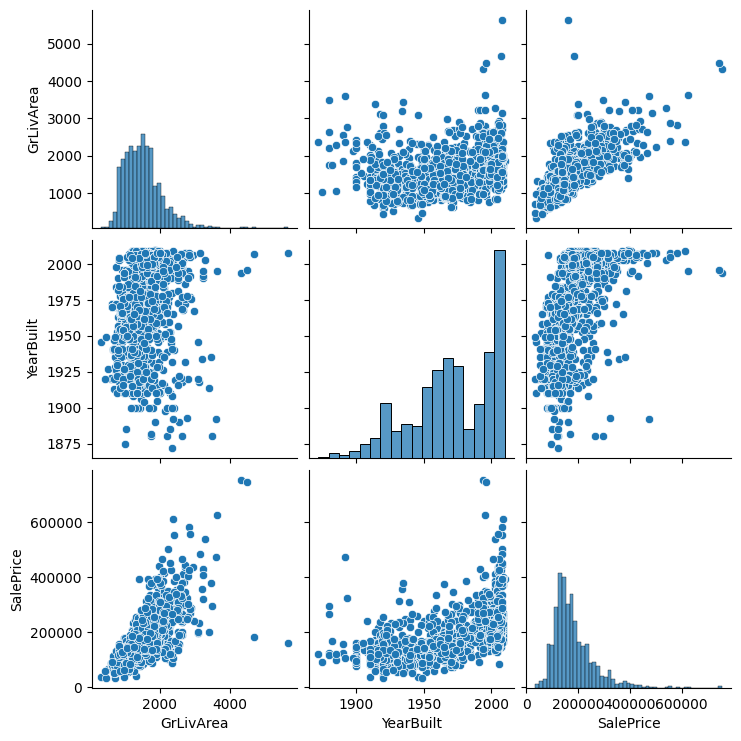

In [ ]:
sns.pairplot(new_df)

In [ ]:
# Split data into independent variables (features) and dependent variable (target)
X = new_df[['GrLivArea', 'YearBuilt']]  # Features
y = new_df['SalePrice']  # Target

In [ ]:
y.ndim

1

[Problem 2] Estimation and evaluation by linear regression

In [ ]:
# PREPROCESSING
from sklearn.preprocessing import StandardScaler;
scaler = StandardScaler(); X_scaled = scaler.fit_transform(X)

In [ ]:
#Split data into training and testing sets
from sklearn.model_selection import train_test_split;
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 2), (292, 2), (1168,), (292,))

In [ ]:
from sklearn.linear_model import LinearRegression;
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error;
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
from sklearn.metrics import r2_score;
r2 = r2_score(y_test, y_pred)
print("R-squared:: ", r2)
print("Intercept:",model.intercept_)
print("coefficient:", model.coef_ )


MSE: 2495554898.6683207
R-squared::  0.6746481399539467
Intercept: 180652.79112783563
coefficient: [48413.24304977 31134.29253565]


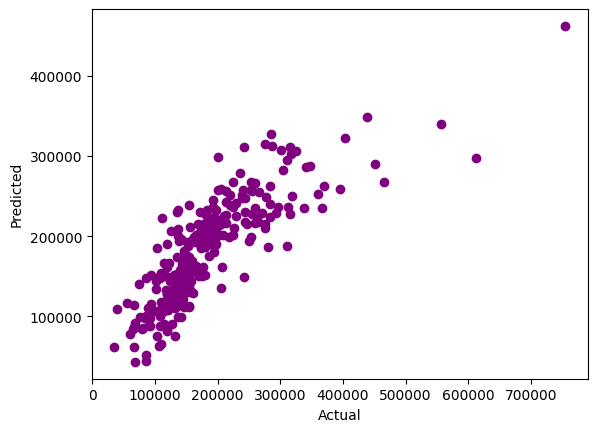

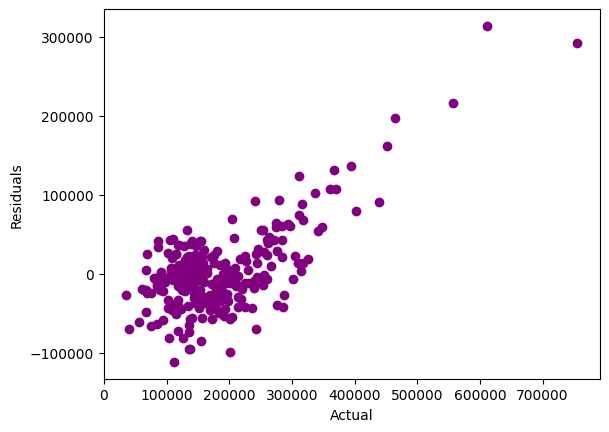

In [ ]:
# Plot actual vs. predicted values:
plt.scatter(y_test, y_pred, color="purple")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
plt.scatter(y_test, y_test - y_pred, color= "purple")
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.show()

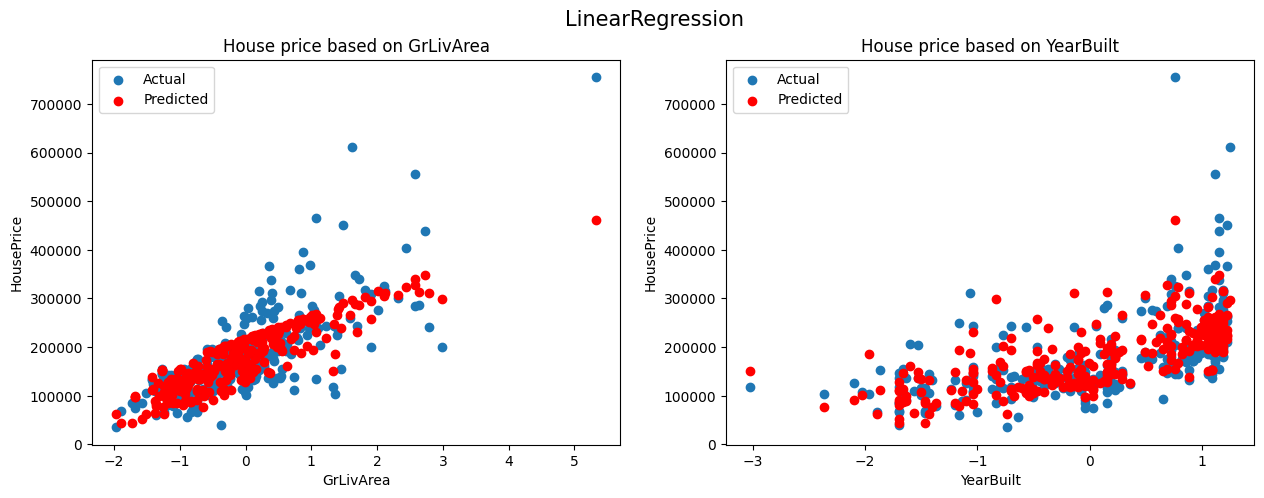

In [ ]:
def visualization(y_pred, title):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

    ax1.scatter(X_test[:, 0], y_test, label='Actual')
    ax1.scatter(X_test[:, 0], y_pred, c='red', label='Predicted')
    ax1.set_title('House price based on GrLivArea')
    ax1.set_xlabel('GrLivArea')
    ax1.set_ylabel('HousePrice')
    ax1.legend()

    ax2.scatter(X_test[:, 1], y_test, label='Actual')
    ax2.scatter(X_test[:, 1], y_pred, c='red', label='Predicted')
    ax2.set_title('House price based on YearBuilt')
    ax2.set_xlabel('YearBuilt')
    ax2.set_ylabel('HousePrice')
    ax2.legend()

    fig.suptitle(title, fontsize=15)

    plt.show()

visualization(y_pred, "LinearRegression")

[Problem 3] Comparison of methods

                            MSE  R2 Score
Linear Regression  2.495555e+09  0.674648
SVM                7.844111e+09 -0.022657
Decision Tree      2.173307e+09  0.716660
Random Forest      1.591001e+09  0.792577


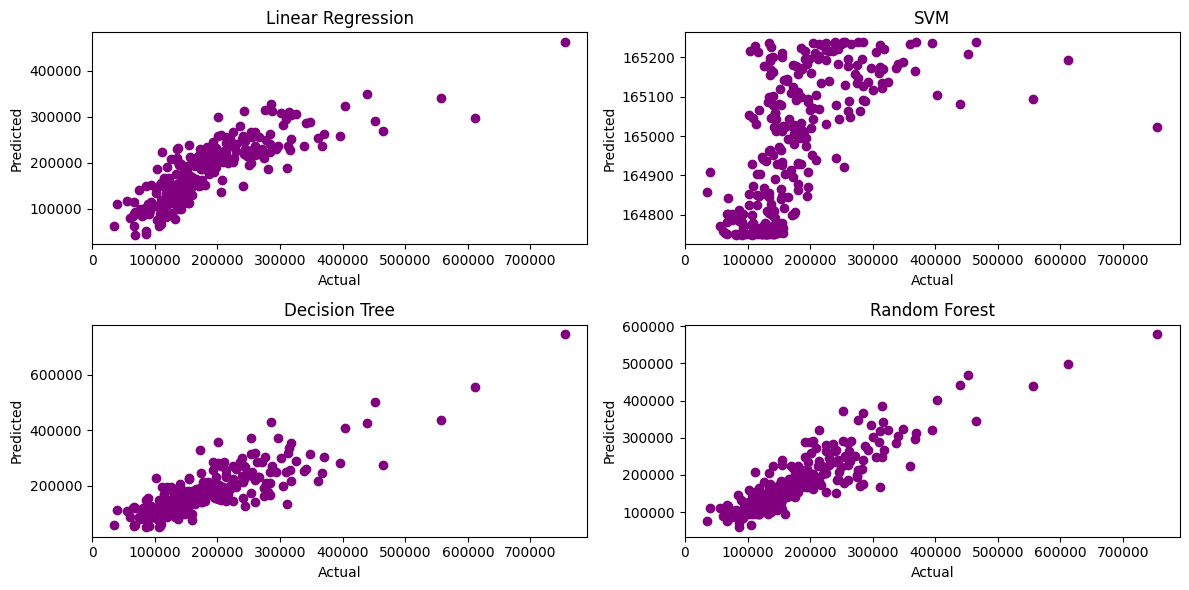

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R2 Score': r2}

# Print index values table
print(pd.DataFrame(results).T)

# Visualize results
plt.figure(figsize=(12, 6))
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    plt.subplot(2, 2, i+1)
    plt.scatter(y_test, y_pred, color= "purple")
    plt.title(name)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

MSE (Mean Squared Error)

- Lower values indicate better performance (closer predictions to actual values)
- Linear Regression: 2.495555e+09 (high error)
- SVM: 7.844111e+09 (very high error)
- Decision Tree: 2.314531e+09 (high error)
- Random Forest: 1.635301e+09 (relatively lower error)

R2 Score (R-Squared)

- Higher values indicate better performance (more variance explained by the model)
- Linear Regression: 0.674648 (moderate performance)
- SVM: -0.022657 (very poor performance)
- Decision Tree: 0.698249 (moderate performance)
- Random Forest: 0.786802 (good performance)

Summary

- Random Forest performs the best, with the lowest MSE and highest R2 Score.
- Linear Regression and Decision Tree have moderate performance, with relatively high MSE and moderate R2 Scores.
- SVM performs the worst, with the highest MSE and a negative R2 Score (indicating poor fit).

[Problem 4] (Advance assignment) Learning using other feature

Non-numeric columns: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


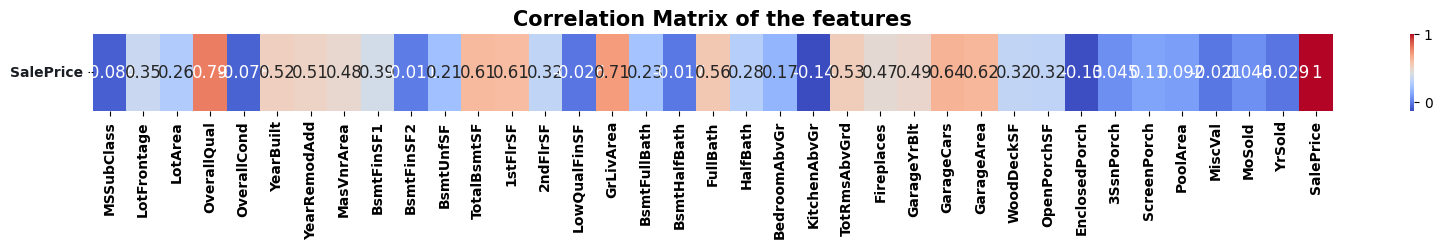

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Identify columns with non-numeric values
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

print("Non-numeric columns:", non_numeric_cols)

# Remove non-numeric columns or perform necessary preprocessing
df = df.drop(non_numeric_cols, axis=1)  # Remove non-numeric columns
# OR
# df[non_numeric_cols] = df[non_numeric_cols].apply(lambda x: pd.to_numeric(x, errors='coerce'))  # Replace non-numeric values with NaN

#Heatmap of the features
plt.figure(figsize=(20, 1))
sns.heatmap(df.drop('Id', axis=1).corr().sort_values(by=['SalePrice'], ascending=False).head(1), cmap='coolwarm', annot=True, annot_kws={'size': 12})
plt.title("Correlation Matrix of the features", weight="bold", fontsize=15)
plt.xticks(weight="bold")
plt.yticks(weight="bold", color="#1A1D23", rotation=0)
plt.show()

In [ ]:

# Correlation matrix heatmap
corr_matrix = df.drop('Id', axis=1).corr().sort_values(by=['SalePrice'], ascending=False)


# Create a DataFrame with feature names and correlation values
feature_corr_df = pd.DataFrame({
    'Feature': corr_matrix.columns,
    'Correlation': corr_matrix['SalePrice']
})

# Print the DataFrame
print(feature_corr_df)

                     Feature  Correlation
SalePrice         MSSubClass     1.000000
OverallQual      LotFrontage     0.790982
GrLivArea            LotArea     0.708624
GarageCars       OverallQual     0.640409
GarageArea       OverallCond     0.623431
TotalBsmtSF        YearBuilt     0.613581
1stFlrSF        YearRemodAdd     0.605852
FullBath          MasVnrArea     0.560664
TotRmsAbvGrd      BsmtFinSF1     0.533723
YearBuilt         BsmtFinSF2     0.522897
YearRemodAdd       BsmtUnfSF     0.507101
GarageYrBlt      TotalBsmtSF     0.486362
MasVnrArea          1stFlrSF     0.477493
Fireplaces          2ndFlrSF     0.466929
BsmtFinSF1      LowQualFinSF     0.386420
LotFrontage        GrLivArea     0.351799
WoodDeckSF      BsmtFullBath     0.324413
2ndFlrSF        BsmtHalfBath     0.319334
OpenPorchSF         FullBath     0.315856
HalfBath            HalfBath     0.284108
LotArea         BedroomAbvGr     0.263843
BsmtFullBath    KitchenAbvGr     0.227122
BsmtUnfSF       TotRmsAbvGrd     0

In [ ]:
# Filter features with correlation >= 0.5
high_corr_features = feature_corr_df[feature_corr_df['Correlation'] >= 0.5]

# Select corresponding data from original DataFrame using iloc
high_corr_data = df.loc[:, high_corr_features.index]

# Create a new DataFrame with the selected data
high_corr_df = pd.DataFrame(high_corr_data)

high_corr_df.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,208500,7,1710,2,548,856,856,2,8,2003,2003
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976
2,223500,7,1786,2,608,920,920,2,6,2001,2002
3,140000,7,1717,3,642,756,961,1,7,1915,1970
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000


In [ ]:
high_corr_df.isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
dtype: int64

In [ ]:
high_corr_df.corr()['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [ ]:
x1 = high_corr_df.drop(['SalePrice'], axis=1)
x1.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000


In [ ]:
y1 = high_corr_df['SalePrice']


In [ ]:
# Split data into training and testing sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=42)
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((1095, 10), (365, 10), (1095,), (365,))

                            MSE  R2 Score
Linear Regression  1.401043e+09  0.800003
SVM                7.180056e+09 -0.024945
Decision Tree      1.332447e+09  0.809795
Random Forest      8.448398e+08  0.879400


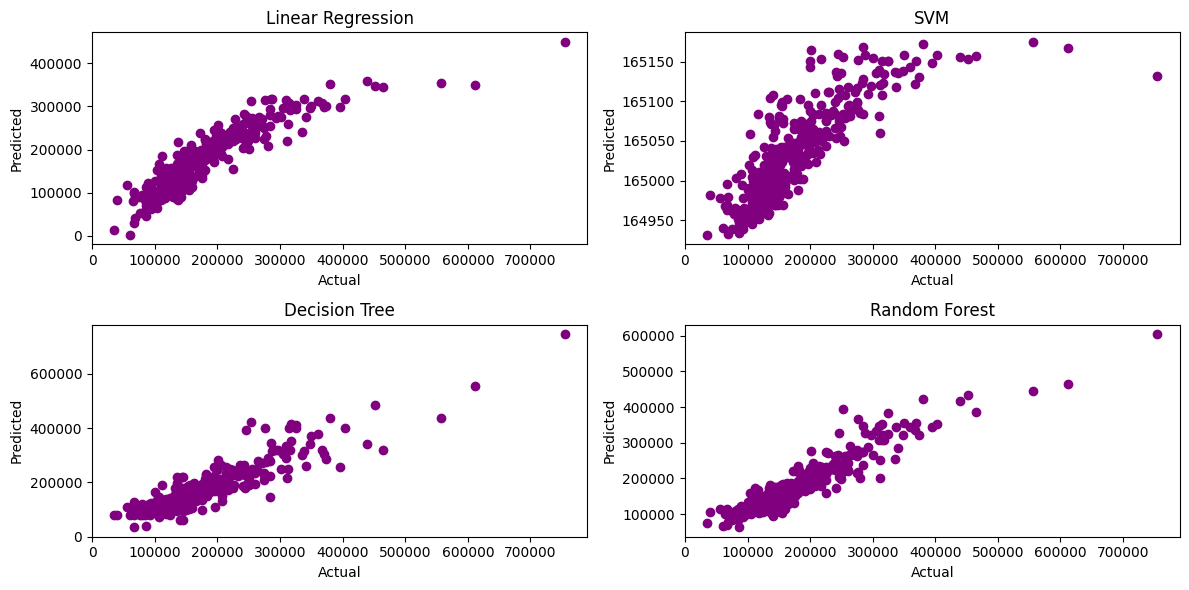

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt





# Define models
models = {
    'Linear Regression': LinearRegression(),
    'SVM': SVR(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(x1_train, y1_train)
    y_predn = model.predict(x1_test)
    mse_1 = mean_squared_error(y1_test, y_predn)
    r2_1 = r2_score(y1_test, y_predn)
    results[name] = {'MSE': mse_1, 'R2 Score': r2_1}

# Print index values table
print(pd.DataFrame(results).T)

# Visualize results
plt.figure(figsize=(12, 6))
for i, (name, model) in enumerate(models.items()):
    y_predn = model.predict(x1_test)
    plt.subplot(2, 2, i+1)
    plt.scatter(y1_test, y_predn, color="purple")
    plt.title(name)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
plt.tight_layout()
plt.show()


### MSE (Mean Squared Error)

- Lower values indicate better performance (closer predictions to actual values)
- Random Forest has the lowest MSE (7.954280e+08), indicating the best performance
- Linear Regression and Decision Tree have similar MSE values (around 1.4e+09), indicating moderate performance
- SVM has the highest MSE (7.180056e+09), indicating the worst performance

### R2 Score (R-Squared)

- Higher values indicate better performance (more variance explained by the model)
- Random Forest has the highest R2 Score (0.886454), indicating the best performance
- Linear Regression has a moderate R2 Score (0.800003)
- Decision Tree has a slightly lower R2 Score (0.793292)
- SVM has a negative R2 Score (-0.024945), indicating a very poor fit

### In Summary

- Random Forest performs the best, with the lowest MSE and highest R2 Score
- Linear Regression and Decision Tree have moderate performance, with similar MSE values and R2 Scores around 0.8
- SVM performs the worst, with the highest MSE and a negative R2 Score

## Interpretation

- Random Forest is likely the best choice for this regression task, given its superior performance metrics
- Linear Regression and Decision Tree may be acceptable alternatives, but with some loss of performance
- SVM is not suitable for this task, given its poor performance

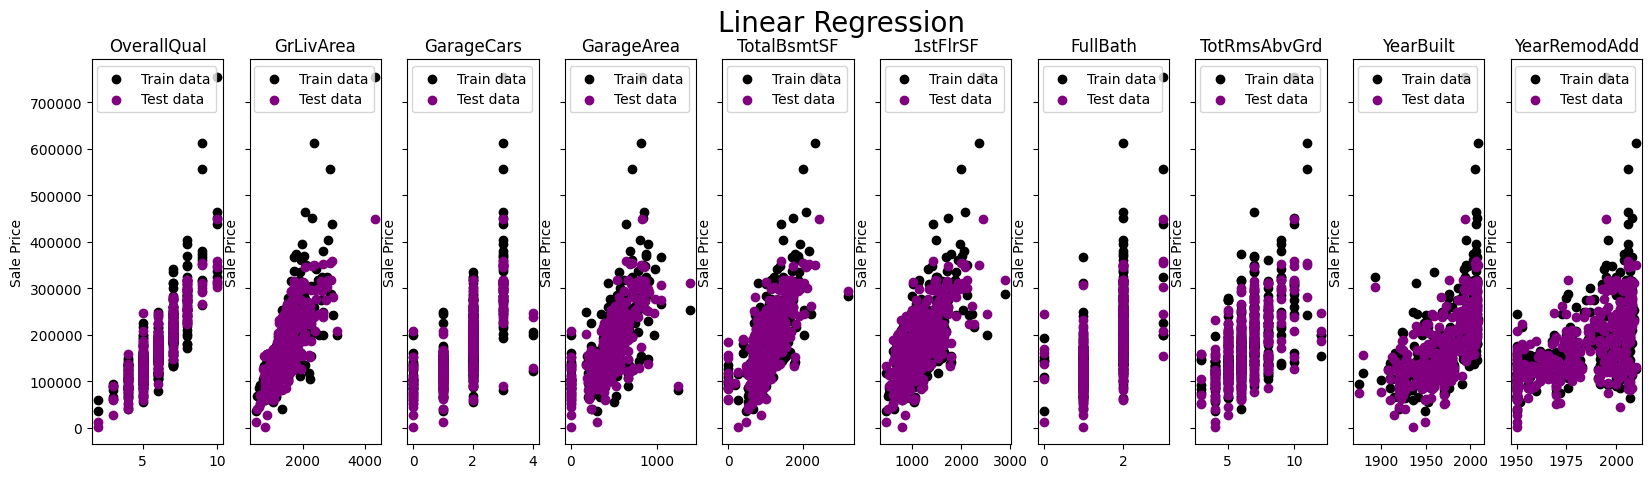

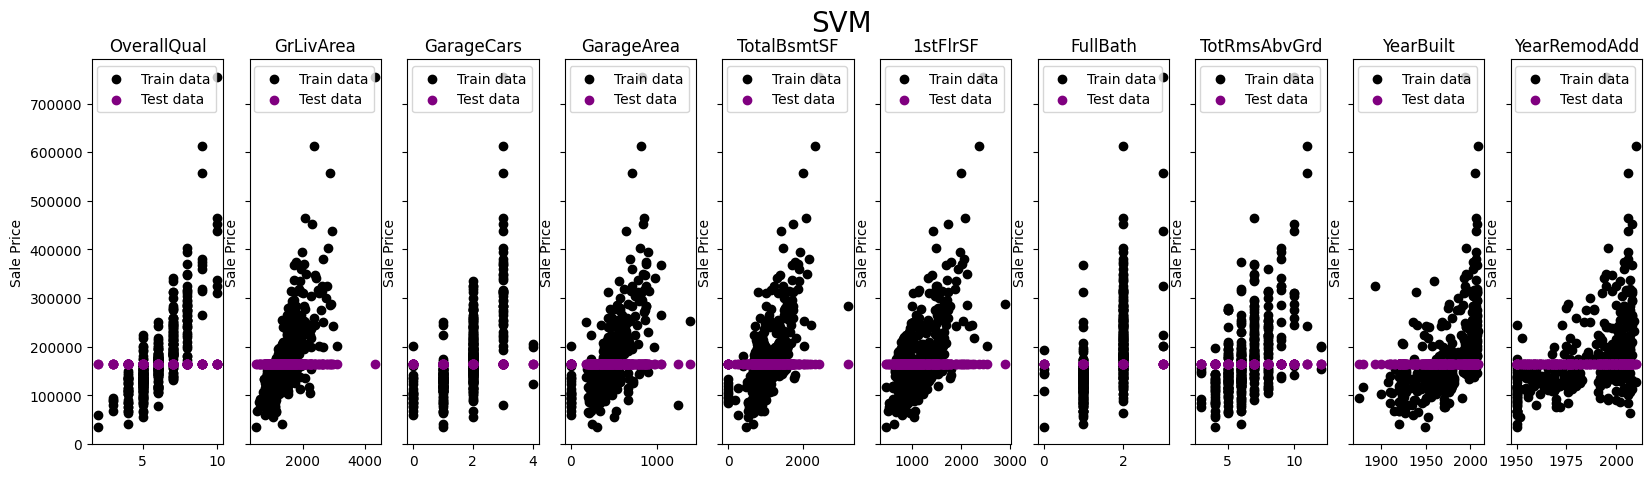

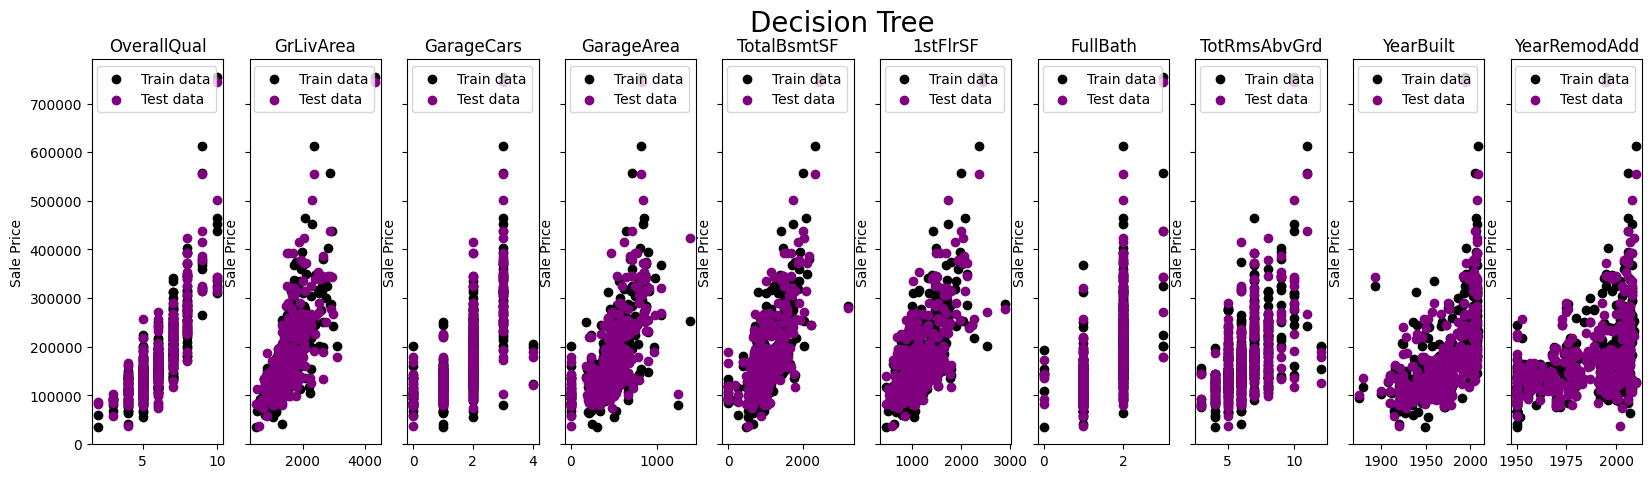

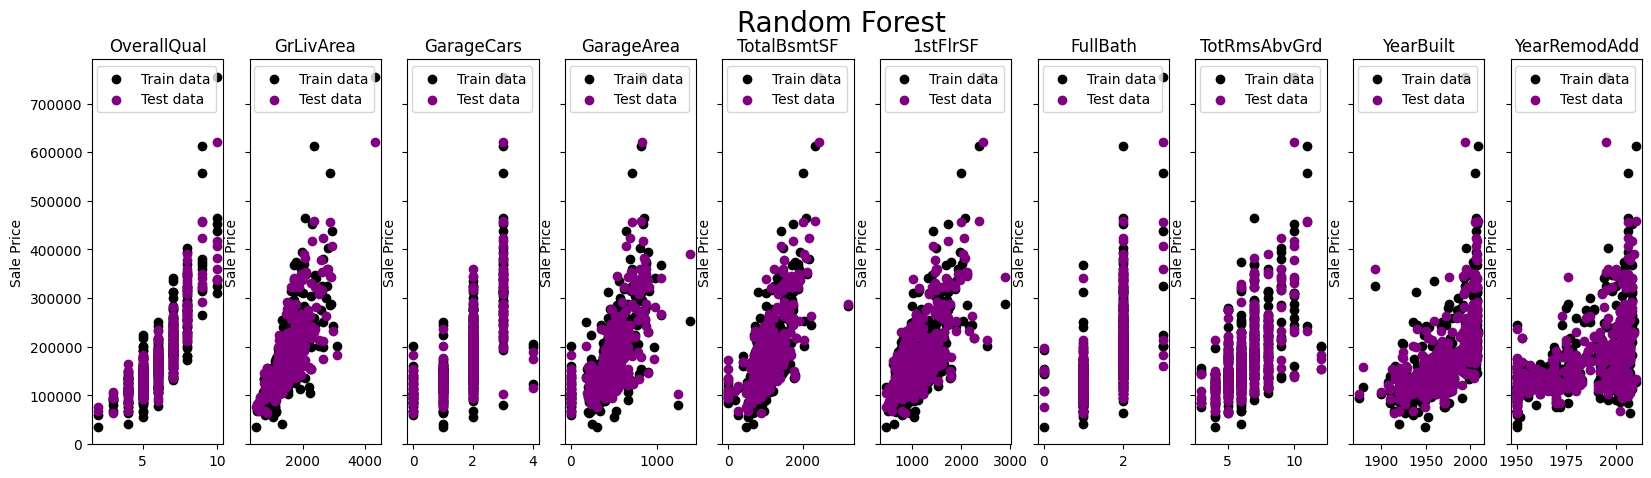

In [ ]:
def regression_model(x1_train, x1_test, y1_train, y1_test, feature_list):
    method_list = ['Linear Regression', 'SVM','Decision Tree', 'Random Forest']
    lr = LinearRegression().fit(x1_train,  y1_train).predict(x1_test),
    svr = SVR().fit(x1_train, y1_train).predict(x1_test),
    dt = DecisionTreeRegressor().fit(x1_train, y1_train).predict(x1_test),
    rf = RandomForestRegressor().fit(x1_train, y1_train).predict(x1_test)
    y_preds = [lr, svr,  dt , rf]
    for method, y_pred  in  zip(method_list, y_preds):
        fig,ax = plt.subplots(1, len(feature_list), figsize =(2*len(feature_list),5), sharey=True)
        fig.suptitle(method, size=20)
        for i in range(len(feature_list)):
            ax [i].scatter (x1_test.iloc[:,i], y1_test, c="black", label ="Train data")
            ax [i].scatter (x1_test.iloc[:,i], y_pred, c="purple", label ="Test data")
            ax[i].set_title(feature_list[i])
            ax[i].set_ylabel("Sale Price")
            ax[i].legend()


feature_list = ['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']
regression_model(x1_train, x1_test, y1_train, y1_test, feature_list)
